# Comparison of logs from answer.ai fsdp_qlora and PEFT QLoRA

## imports

In [1]:
import json

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## load data

### load torchtune logs

In [3]:
with open("log_answerai.txt", "r") as f:
    logs_aa = f.readlines()

In [4]:
rows = [json.loads(line) for line in logs_aa]

In [5]:
df_aa = pd.DataFrame(rows)

### load peft logs

In [6]:
with open("log_peft.txt", "r") as f:
    logs_peft = f.readlines()

In [7]:
rows = [json.loads(line) for line in logs_peft]

In [8]:
df_peft = pd.DataFrame(rows)

In [9]:
df_peft.shape

(32, 8)

### join

In [10]:
df = df_aa.merge(df_peft, on="step", suffixes=("_aa", "_peft"), how="outer")

In [11]:
df[sorted(df)].describe().T[["mean", "50%"]]

,mean,50%
loss_aa,1.231404,1.208879
loss_peft,1.231132,1.208909
lr_aa,0.000010,0.000010
lr_peft,0.000010,0.000010
peak_memory_active_aa,7.834485,7.931185
peak_memory_active_peft,7.592034,7.671901
peak_memory_alloc_aa,7.731931,7.828631
peak_memory_alloc_peft,7.542425,7.621299
peak_memory_reserved_aa,9.921233,9.930015
peak_memory_reserved_peft,9.799598,9.808380


## comparison

### loss

<Axes: title={'center': 'loss'}, xlabel='step', ylabel='loss'>

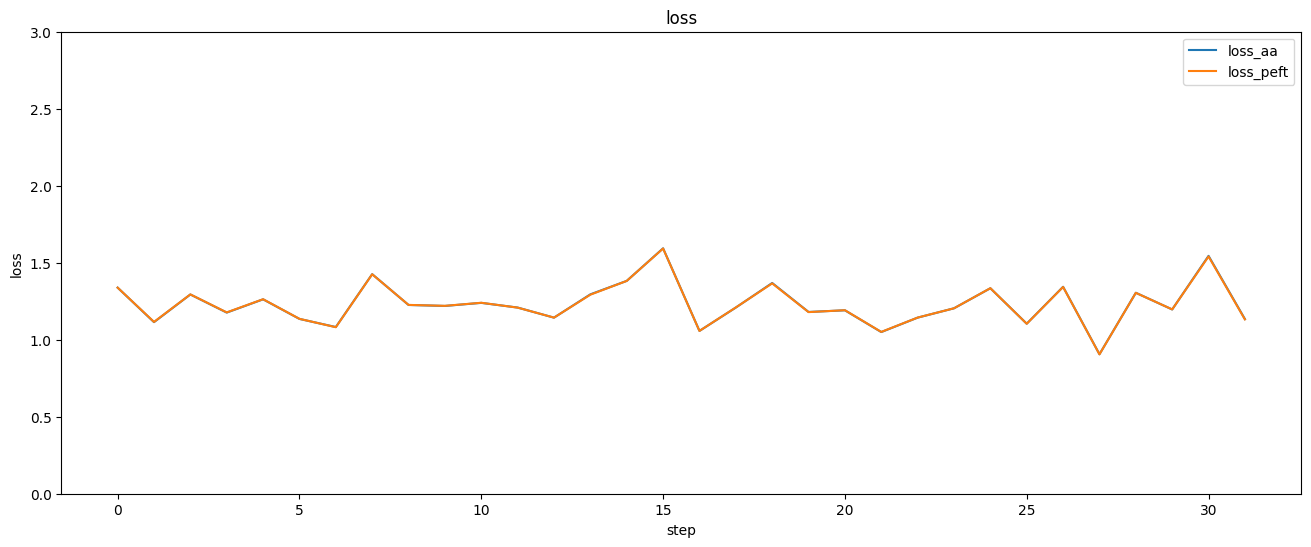

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))
kw = {"ylim": [0, 3], "ylabel": "loss", "xlabel": "step"}
df[["loss_aa", "loss_peft"]].plot(ax=ax, title="loss", **kw)

### tokens per second

<Axes: title={'center': 'tokens per second'}, xlabel='step', ylabel='tokens per second'>

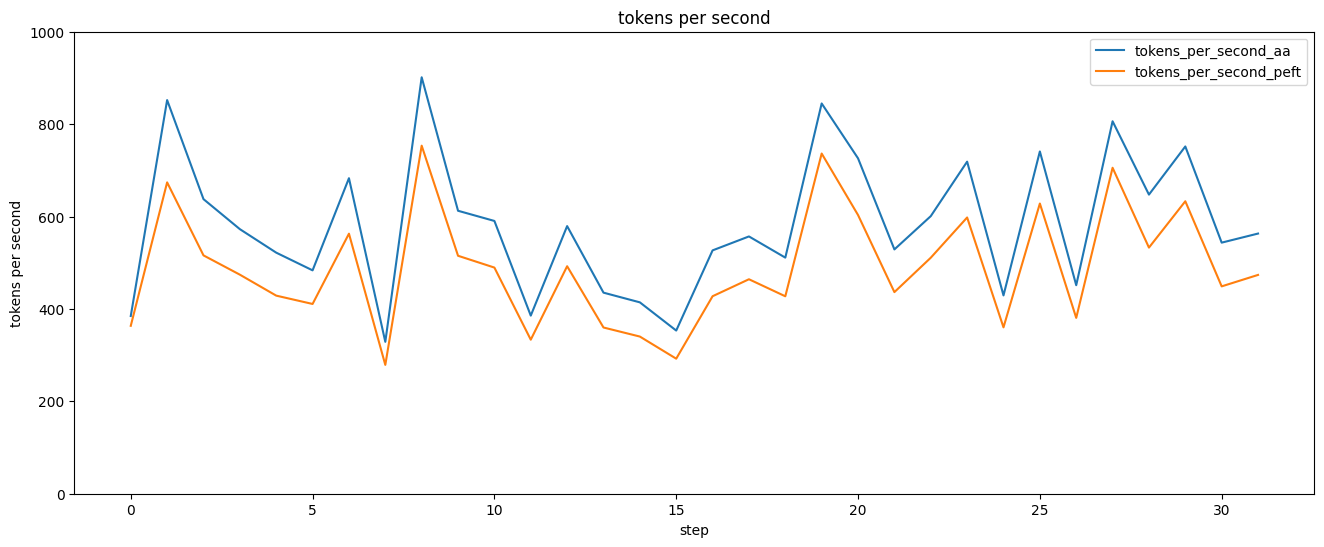

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
kw = {"ylabel": "tokens per second", "xlabel": "step", "ylim": [0, 1000]}
df[["tokens_per_second_aa", "tokens_per_second_peft"]].plot(ax=ax, title="tokens per second", **kw)

### memory

<Axes: title={'center': 'memory, rolling mean (50)'}, xlabel='step', ylabel='memory (GB)'>

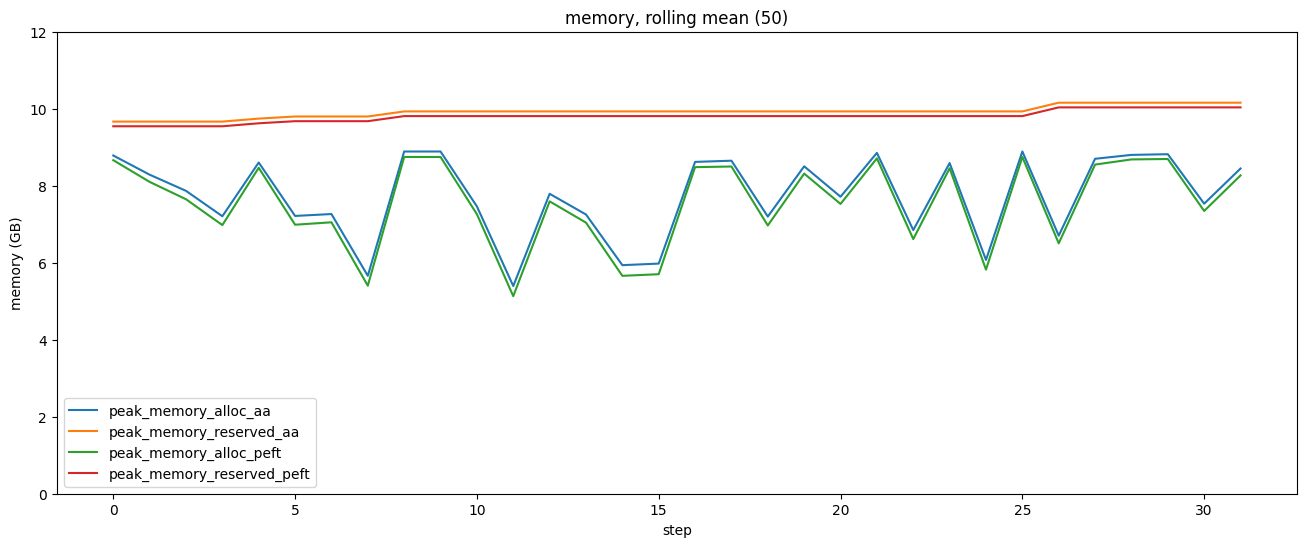

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
kw = {"ylabel": "memory (GB)", "xlabel": "step", "ylim": [0, 12]}
df[["peak_memory_alloc_aa", "peak_memory_reserved_aa", "peak_memory_alloc_peft", "peak_memory_reserved_peft"]].plot(ax=ax, title="memory, rolling mean (50)", **kw)